In [1]:
import pickle

# 数据加载
with open('data.pkl','rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_hour,order_week_day,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,22,2,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,12,5,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,12,5,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,11,5,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,11,5,2018-01
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,327.750000,0,1/19/2018 11:03,Standard Class,KimberlyFlowers,2018,1,11,5,2018-01
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 10:42,First Class,ConstanceTerrell,2018,1,10,5,2018-01
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,327.750000,0,1/15/2018 10:21,First Class,EricaStevens,2018,1,10,5,2018-01
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/16/2018 10:00,Second Class,NicholeOlsen,2018,1,10,5,2018-01
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,327.750000,0,1/15/2018 9:39,First Class,OprahDelacruz,2018,1,9,5,2018-01


In [2]:
import numpy as np
# 构造新列fraud 欺诈交易
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1 ,0)
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)
# 如果数据为SUSPECTED_FRAUD 就为1, 否则为0
train_data
# ['Order Status','Delivery Status'] 为防止标签泄露, 要drop这两特征

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_hour,order_week_day,order_month_year,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,22,2,2018-01,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,12,5,2018-01,0,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,12,5,2018-01,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1/16/2018 11:45,Standard Class,TanaTate,2018,1,11,5,2018-01,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,11,5,2018-01,0,0
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,1/19/2018 11:03,Standard Class,KimberlyFlowers,2018,1,11,5,2018-01,0,0
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,1/15/2018 10:42,First Class,ConstanceTerrell,2018,1,10,5,2018-01,0,1
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,1/15/2018 10:21,First Class,EricaStevens,2018,1,10,5,2018-01,0,1
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,1/16/2018 10:00,Second Class,NicholeOlsen,2018,1,10,5,2018-01,0,1
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,1/15/2018 9:39,First Class,OprahDelacruz,2018,1,9,5,2018-01,0,1


In [3]:
import pandas as pd
pd.set_option('max_columns', None) #展开dataframe
# 查看有哪些object类型
# train_data.dtypes
categorical_cols = train_data.select_dtypes(include='object').columns
train_data[categorical_cols]
# 不需要的列: # ['Customer Email','Customer Password','Product Image','Customer Fname','Customer Lname']


,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class,OrliHendricks
5,TRANSFER,Shipping canceled,Sporting Goods,Tonawanda,EE. UU.,XXXXXXXXX,Kimberly,Flowers,XXXXXXXXX,Consumer,NY,2122 Hazy Corner,Fitness,Pacific Asia,Toowoomba,Australia,Oceania,Queensland,CANCELED,http://images.acmesports.sports/Smart+watch,Smart watch,1/19/2018 11:03,Standard Class,KimberlyFlowers
6,DEBIT,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Constance,Terrell,XXXXXXXXX,Home Office,PR,1879 Green Pine Bank,Fitness,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 10:42,First Class,ConstanceTerrell
7,TRANSFER,Late delivery,Sporting Goods,Miami,EE. UU.,XXXXXXXXX,Erica,Stevens,XXXXXXXXX,Corporate,FL,7595 Cotton Log Row,Fitness,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,PROCESSING,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 10:21,First Class,EricaStevens
8,CASH,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Nichole,Olsen,XXXXXXXXX,Corporate,PR,2051 Dusty Route,Fitness,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 10:00,Second Class,NicholeOlsen
9,CASH,Late delivery,Sporting Goods,San Ramon,EE. UU.,XXXXXXXXX,Oprah,Delacruz,XXXXXXXXX,Corporate,CA,9139 Blue Blossom Court,Fitness,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 9:39,First Class,OprahDelacruz


In [4]:
# 不需要的列: # ['Customer Email','Customer Password','Product Image','Customer Fname','Customer Lname']
train_data.drop(['Customer Email','Customer Password','Product Image','Customer Fname','Customer Lname'], axis = 1, inplace = True)
# 去掉这两类, 防止标签泄露:feature中包含了label(直接知道答案了)
train_data.drop(['Order Status','Delivery Status'], axis = 1, inplace=True)

In [5]:
len(train_data.columns)

54

In [6]:
# 去掉 Customer Full name 为空的8个样本: 因为数据量远远大于数据缺失值
train_data['Customer Full Name'].isnull().sum()
train_data.dropna(subset=['Customer Full Name'], inplace=True)

In [7]:
# 去掉不重要的字段: ['Order Zipcode','order date (DateOrders)','Product Description','Product Status','shipping date (DateOrders)']
train_data['Order Zipcode'].isnull().sum()
train_data['Product Description'].isnull().sum()
train_data['Product Status'].value_counts() # 唯一值为1
train_data.drop(['Order Zipcode','order date (DateOrders)','Product Description','Product Status','shipping date (DateOrders)'],axis=1, inplace=True)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# 特征字段相关性 热力图
plt.figure(figsize=(20,16))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [8]:
# 去掉完全相关的特征,防止特征泄露
train_data.drop(['Order Customer Id', 'Order Item Total', 'Order Profit Per Order','Product Card Id', 'Product Category Id', 'Late_delivery_risk'], axis=1, inplace=True)

In [9]:
len(train_data.columns)
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Product Name', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

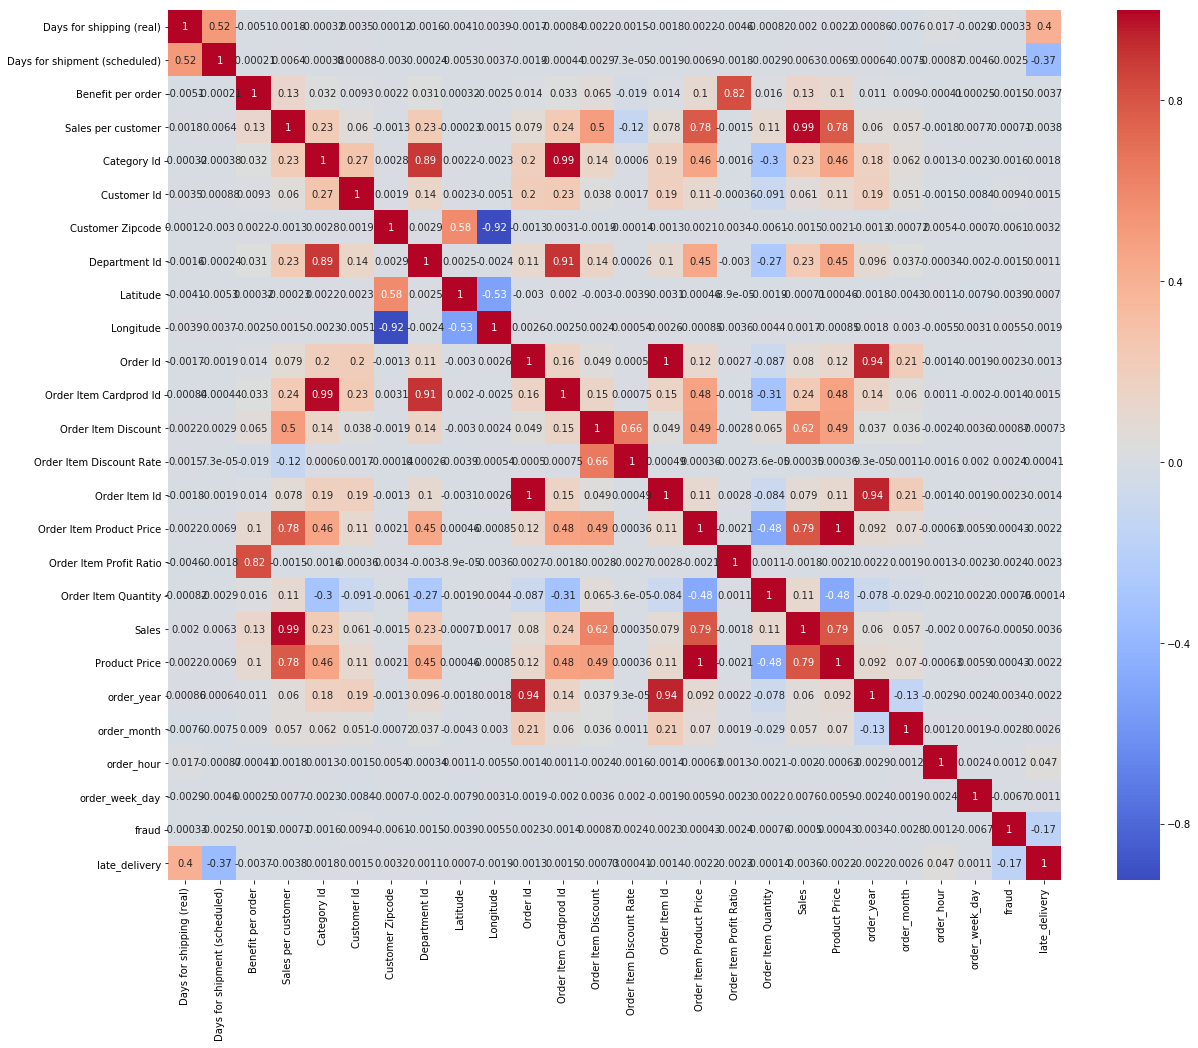

In [40]:
# 多重共线性 0.99 共线性. feature importance 会失效
plt.figure(figsize=(20,16))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [10]:
#['Order Item Cardprod Id' , 'Order Item Id','Sales per customer','order_year','Product Price'] 去除相关性大于0.9的特征 
train_data.drop(['Order Item Cardprod Id' , 'Order Item Id','Sales per customer','order_year'], axis=1, inplace=True)

In [11]:
train_data.drop(['Order Item Product Price'], axis=1, inplace=True)

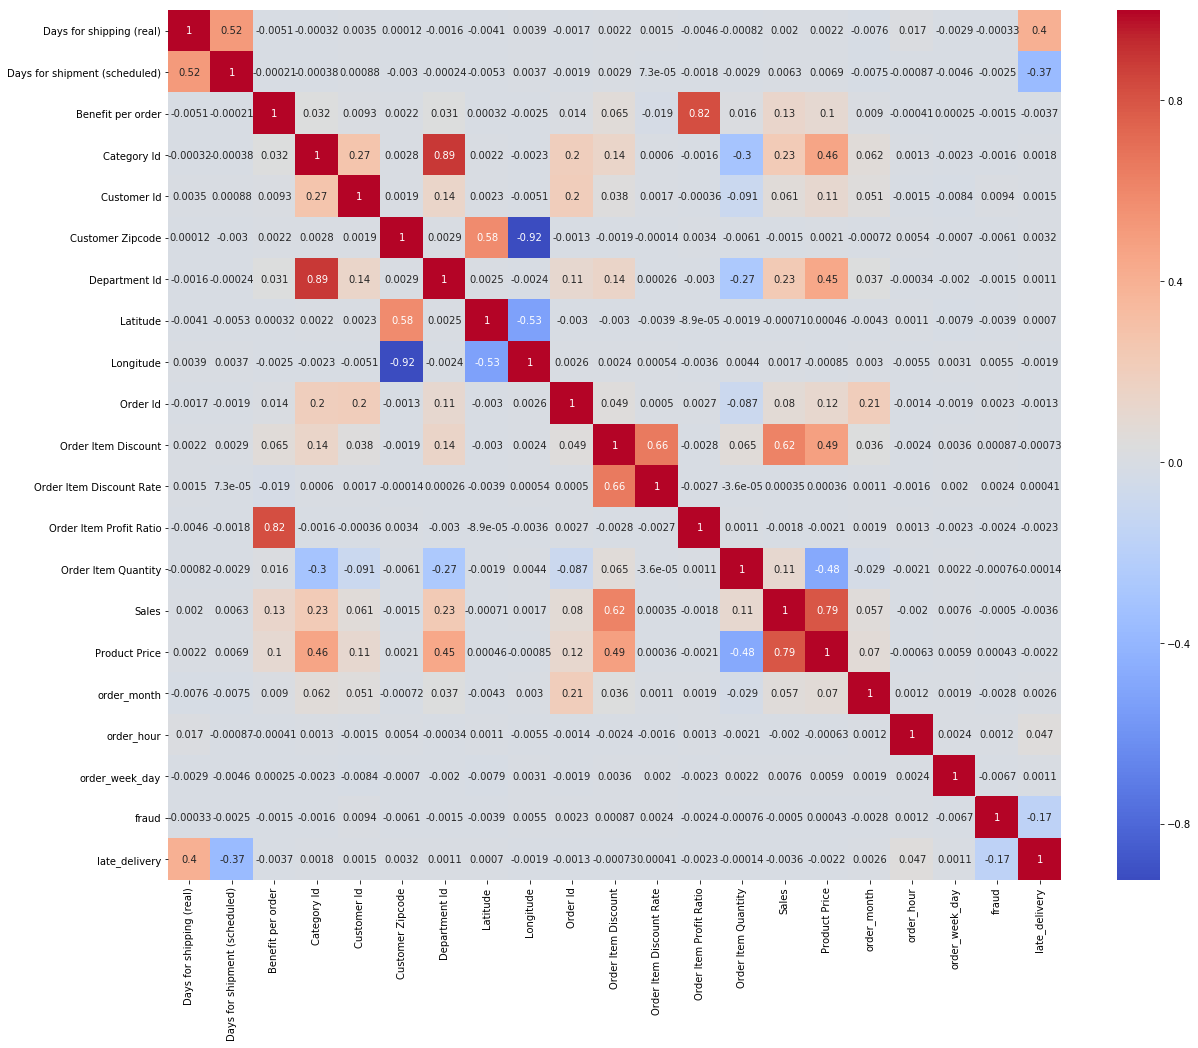

In [14]:
plt.figure(figsize=(20,16))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [46]:
# train_data.to_pickle('train_data.pkl')

In [15]:
train_data[categorical_cols]
# 使用LabelEncoder 进行类别特征的转换
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Product Price,Shipping Mode,Customer Full Name,order_month,order_hour,order_week_day,order_month_year,fraud,late_delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,3683,725.0,2,4,18.251453,-66.037056,3,331,70,77202,13.110000,0.04,0.29,1,327.750000,15,475,78,327.750000,3,1875,1,22,2,2018-01,0,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,1400,725.0,2,4,18.279451,-66.037064,3,391,69,75939,16.389999,0.05,-0.80,1,327.750000,13,841,78,327.750000,3,5374,1,12,5,2018-01,0,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,6217,95125.0,2,4,37.292233,-121.881279,3,391,69,75938,18.030001,0.06,-0.80,1,327.750000,13,841,78,327.750000,3,4426,1,12,5,2018-01,0,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,1803,90027.0,2,4,34.125946,-118.291016,3,3226,8,75937,22.940001,0.07,0.08,1,327.750000,11,835,78,327.750000,3,12922,1,11,5,2018-01,0,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,6345,725.0,2,4,18.253769,-66.037048,3,3226,8,75936,29.500000,0.09,0.45,1,327.750000,11,835,78,327.750000,3,10632,1,11,5,2018-01,0,0
5,3,6,4,18.580000,73,40,505,0,19488,0,31,966,14150.0,2,4,43.013969,-78.879066,3,3207,8,75935,32.779999,0.10,0.06,1,327.750000,11,835,78,327.750000,3,7295,1,11,5,2018-01,0,0
6,1,2,1,95.180000,73,40,66,1,19487,2,36,766,725.0,2,4,18.242538,-66.037056,3,1236,31,75934,39.330002,0.12,0.33,1,327.750000,7,386,78,327.750000,0,2722,1,10,5,2018-01,0,1
7,3,2,1,68.430000,73,40,318,0,19486,1,10,5488,33162.0,2,4,25.928869,-80.162872,3,1236,31,75933,42.610001,0.13,0.24,1,327.750000,7,386,78,327.750000,0,3898,1,10,5,2018-01,0,1
8,0,3,2,133.720001,73,40,66,1,19485,1,36,909,725.0,2,4,18.233223,-66.037056,3,1236,31,75932,49.160000,0.15,0.48,1,327.750000,7,386,78,327.750000,2,10347,1,10,5,2018-01,0,1
9,0,2,1,132.149994,73,40,457,0,19484,1,5,6740,94583.0,2,4,37.773991,-121.966629,3,1236,31,75931,52.439999,0.16,0.48,1,327.750000,7,386,78,327.750000,0,10593,1,9,5,2018-01,0,1


In [16]:
train_data.dtypes
# period[M]数据类型无法直接使用
train_data.drop(['order_month_year'],axis=1,inplace=True)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Product Price,Shipping Mode,Customer Full Name,order_month,order_hour,order_week_day,fraud,late_delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,3683,725.0,2,4,18.251453,-66.037056,3,331,70,77202,13.110000,0.04,0.29,1,327.750000,15,475,78,327.750000,3,1875,1,22,2,0,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,1400,725.0,2,4,18.279451,-66.037064,3,391,69,75939,16.389999,0.05,-0.80,1,327.750000,13,841,78,327.750000,3,5374,1,12,5,0,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,6217,95125.0,2,4,37.292233,-121.881279,3,391,69,75938,18.030001,0.06,-0.80,1,327.750000,13,841,78,327.750000,3,4426,1,12,5,0,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,1803,90027.0,2,4,34.125946,-118.291016,3,3226,8,75937,22.940001,0.07,0.08,1,327.750000,11,835,78,327.750000,3,12922,1,11,5,0,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,6345,725.0,2,4,18.253769,-66.037048,3,3226,8,75936,29.500000,0.09,0.45,1,327.750000,11,835,78,327.750000,3,10632,1,11,5,0,0
5,3,6,4,18.580000,73,40,505,0,19488,0,31,966,14150.0,2,4,43.013969,-78.879066,3,3207,8,75935,32.779999,0.10,0.06,1,327.750000,11,835,78,327.750000,3,7295,1,11,5,0,0
6,1,2,1,95.180000,73,40,66,1,19487,2,36,766,725.0,2,4,18.242538,-66.037056,3,1236,31,75934,39.330002,0.12,0.33,1,327.750000,7,386,78,327.750000,0,2722,1,10,5,0,1
7,3,2,1,68.430000,73,40,318,0,19486,1,10,5488,33162.0,2,4,25.928869,-80.162872,3,1236,31,75933,42.610001,0.13,0.24,1,327.750000,7,386,78,327.750000,0,3898,1,10,5,0,1
8,0,3,2,133.720001,73,40,66,1,19485,1,36,909,725.0,2,4,18.233223,-66.037056,3,1236,31,75932,49.160000,0.15,0.48,1,327.750000,7,386,78,327.750000,2,10347,1,10,5,0,1
9,0,2,1,132.149994,73,40,457,0,19484,1,5,6740,94583.0,2,4,37.773991,-121.966629,3,1236,31,75931,52.439999,0.16,0.48,1,327.750000,7,386,78,327.750000,0,10593,1,9,5,0,1


In [17]:
from sklearn.model_selection import train_test_split
# 构造x,y
x_sales = train_data.loc[:, train_data.columns != 'Sales']
y_sales = train_data['Sales']
# 切分数据集
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size = 0.2)

x_quantity = train_data.loc[:, train_data.columns != 'Order Item Quantity']
y_quantity = train_data['Order Item Quantity']
# 切分数据集
x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test = train_test_split(x_quantity, y_quantity, test_size = 0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
# 数据规范化
ss = StandardScaler()
x_sales_train = ss.fit_transform(x_sales_train)
x_sales_test = ss.transform(x_sales_test)

x_quantity_train = ss.fit_transform(x_quantity_train)
x_quantity_test = ss.transform(x_quantity_test)

F:\learn\Python\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\learn\Python\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
F:\learn\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """
F:\learn\Python\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\learn\Python\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64

In [34]:
result = pd.DataFrame(columns=['model','task','mae'])
result

,model,task,mae


In [26]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import mean_absolute_error
def model_stats(model, x_train, x_test, y_train, y_test, name='Sales'):
    global result
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    temp = {'model' :str(model), 'task' : name ,'mae': mae}
    result = result.append(temp, ignore_index = True)
    return mae

In [35]:
# AutoML 重点 特征工程 => 数据基础,决定上限 70%, 多模型 (LR, SVM, XGBoost) => Ensemble 20%
# 调参 10% => 祖传参数 (网格搜素, 贝叶斯调参) 时间 * 倍数 20 分钟 * 10 = 200
from sklearn.linear_model import LinearRegression

model_sales = LinearRegression()
model_quantity = LinearRegression()
# 模型评估
mae = model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,name='Sales')
# temp = {'model' : 'LR', 'task' : 'Fraud', 'accuracy' : accuracy, 'recall' : recall, 'f1' : f1}
# result = result.append(temp, ignore_index = True)

mae = model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test,name='Quantity')
# temp = {'model' : 'LR', 'task' : 'Late', 'accuracy' : accuracy, 'recall' : recall, 'f1' : f1}
# result = result.append(temp, ignore_index = True)
result

,model,task,mae
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",Sales,18.308280
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",Quantity,0.345847


In [36]:
from sklearn.linear_model import Lasso
model_sales = Lasso()
model_quantity = Lasso()
# 模型评估
mae = model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,name='Sales')
# temp = {'model' : 'GaussianNB', 'task' : 'Fraud', 'accuracy' : accuracy, 'recall' : recall, 'f1' : f1}
# result = result.append(temp, ignore_index = True)

mae = model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test,name='Quantity')
# temp = {'model' : 'GaussianNB', 'task' : 'Late', 'accuracy' : accuracy, 'recall' : recall, 'f1' : f1}
# result = result.append(temp, ignore_index = True)
result

,model,task,mae
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",Sales,18.308280
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",Quantity,0.345847
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,17.481546
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,1.266673


In [37]:
from sklearn.linear_model import Ridge
model_sales = Ridge()
model_quantity = Ridge()
# 模型评估
mae = model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,name='Sales')
# temp = {'model' : 'GaussianNB', 'task' : 'Fraud', 'accuracy' : accuracy, 'recall' : recall, 'f1' : f1}
# result = result.append(temp, ignore_index = True)

mae = model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test,name='Quantity')
# temp = {'model' : 'GaussianNB', 'task' : 'Late', 'accuracy' : accuracy, 'recall' : recall, 'f1' : f1}
# result = result.append(temp, ignore_index = True)
result

,model,task,mae
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",Sales,18.308280
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",Quantity,0.345847
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,17.481546
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,1.266673
4,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,18.308343
5,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,0.345859


In [38]:
from sklearn.tree import DecisionTreeRegressor
model_sales = DecisionTreeRegressor()
model_quantity = DecisionTreeRegressor()
# 模型评估
mae = model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,name='Sales')
mae = model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test,name='Quantity')
result

,model,task,mae
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",Sales,1.830828e+01
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",Quantity,3.458467e-01
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,1.748155e+01
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,1.266673e+00
4,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,1.830834e+01
5,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,3.458586e-01
6,"DecisionTreeRegressor(criterion='mse', max_dep...",Sales,1.152572e-11
7,"DecisionTreeRegressor(criterion='mse', max_dep...",Quantity,0.000000e+00


In [39]:
import xgboost as xgb
model_sales = xgb.XGBRegressor()
model_quantity = xgb.XGBRegressor()
# 模型评估
mae = model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,name='Sales')
mae = model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test,name='Quantity')
result

F:\learn\Python\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:44:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


F:\learn\Python\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:45:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,model,task,mae
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",Sales,1.830828e+01
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",Quantity,3.458467e-01
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,1.748155e+01
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,1.266673e+00
4,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,1.830834e+01
5,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,3.458586e-01
6,"DecisionTreeRegressor(criterion='mse', max_dep...",Sales,1.152572e-11
7,"DecisionTreeRegressor(criterion='mse', max_dep...",Quantity,0.000000e+00
8,"XGBRegressor(base_score=0.5, booster='gbtree',...",Sales,2.641903e+00
9,"XGBRegressor(base_score=0.5, booster='gbtree',...",Quantity,3.501799e-02


In [40]:
import lightgbm as lgb
model_sales = lgb.LGBMRegressor()
model_quantity = lgb.LGBMRegressor()
# 模型评估
mae = model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,name='Sales')
mae = model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test,name='Quantity')
result

,model,task,mae
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",Sales,1.830828e+01
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",Quantity,3.458467e-01
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,1.748155e+01
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,1.266673e+00
4,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,1.830834e+01
5,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,3.458586e-01
6,"DecisionTreeRegressor(criterion='mse', max_dep...",Sales,1.152572e-11
7,"DecisionTreeRegressor(criterion='mse', max_dep...",Quantity,0.000000e+00
8,"XGBRegressor(base_score=0.5, booster='gbtree',...",Sales,2.641903e+00
9,"XGBRegressor(base_score=0.5, booster='gbtree',...",Quantity,3.501799e-02


In [41]:
from sklearn.ensemble import RandomForestRegressor
model_sales = RandomForestRegressor()
model_quantity = RandomForestRegressor()
# 模型评估
mae = model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,name='Sales')
mae = model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test,name='Quantity')
result

F:\learn\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\learn\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,model,task,mae
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",Sales,1.830828e+01
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",Quantity,3.458467e-01
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,1.748155e+01
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,1.266673e+00
4,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Sales,1.830834e+01
5,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Quantity,3.458586e-01
6,"DecisionTreeRegressor(criterion='mse', max_dep...",Sales,1.152572e-11
7,"DecisionTreeRegressor(criterion='mse', max_dep...",Quantity,0.000000e+00
8,"XGBRegressor(base_score=0.5, booster='gbtree',...",Sales,2.641903e+00
9,"XGBRegressor(base_score=0.5, booster='gbtree',...",Quantity,3.501799e-02


In [101]:
result.to_pickle('result.pkl')

In [49]:
# 使用神经网路进行分类
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
keras.layers.BatchNormalization() # 神经网络归一化
model = Sequential()
model.add(Dense(1024, activation= 'relu', kernel_initializer = 'random_normal', input_dim = x_sales_train.shape[1]))
model.add(Dense(512, activation= 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(256, activation= 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(128, activation= 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(64, activation= 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(32, activation= 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(1, activation= 'relu', kernel_initializer = 'random_normal'))# 二分类任务用sigmoid
# 设置优化器
model.compile(optimizer='adam', loss = 'mean_absolute_error') # 二分类任务用交叉信息熵
# 模型训练
model.fit(x_sales_train, y_sales_train, batch_size=512, epochs = 10)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/10
144408/144408 [==============================] - 16s 108us/sample - loss: 38.5918
Epoch 2/10
144408/144408 [==============================] - 13s 87us/sample - loss: 8.5045
Epoch 3/10
144408/144408 [==============================] - 12s 84us/sample - loss: 5.7855
Epoch 4/10
144408/144408 [==============================] - 12s 85us/sample - loss: 5.3016s
Epoch 5/10
144408/144408 [==============================] - 12s 84us/sample - loss: 4.3225
Epoch 6/10
144408/144408 [==============================] - 12s 85us/sample - loss: 4.1131
Epoch 7/10
144408/144408 [==============================] - 13s 89us/sample - loss: 4.1802
Epoch 8/10
144408/144408 [==============================] - 12s 85us/sample - loss: 3.4354
Epoch 9/10
144408/144408 [==============================] - 12s 86us/sample - loss: 3.2473
Epoch 10/10
144408/144408 [==============================] -

In [52]:
from sklearn.metrics import accuracy_score
# 模型评估
train_evaluate = model.evaluate(x_sales_train, y_sales_train)
test_evaluate = model.evaluate(x_sales_test, y_sales_test)
y_sales_pred = model.predict(x_sales_test, batch_size=512) # 结果是一个概率值
# print('准确率:', accuracy_score(y_sales_test,y_sales_pred))

36103/36103 [==============================] - 5s 137us/sample - loss: 3.1043


In [55]:
y_sales_pred
print('mae:', mean_absolute_error(y_sales_test,y_sales_pred))

准确率: 3.1043180226902067
